In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time 
import json
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from config import api_key

In [2]:
# Range of latitudes and longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for hold lat_lngs and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.

- Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set url for API
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Build partial query URL
query_url = f"{url}appid={api_key}&q="

In [5]:
# API reference for structure
response = requests.get(query_url + 'Shanghai')
data = response.json()
print(json.dumps(data, indent=2))

{
  "coord": {
    "lon": 121.4581,
    "lat": 31.2222
  },
  "weather": [
    {
      "id": 500,
      "main": "Rain",
      "description": "light rain",
      "icon": "10d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 289.89,
    "feels_like": 289.64,
    "temp_min": 289.82,
    "temp_max": 290.15,
    "pressure": 1012,
    "humidity": 82
  },
  "visibility": 10000,
  "wind": {
    "speed": 2,
    "deg": 0
  },
  "rain": {
    "1h": 0.37
  },
  "clouds": {
    "all": 75
  },
  "dt": 1614232336,
  "sys": {
    "type": 1,
    "id": 9659,
    "country": "CN",
    "sunrise": 1614205553,
    "sunset": 1614246541
  },
  "timezone": 28800,
  "id": 1796236,
  "name": "Shanghai",
  "cod": 200
}


In [6]:
# Set empty lists to hold latitude, longitude and temperature
lat = []
lon = []
tmp_max = []
c_name = []
humidity = []
cloudiness = []
w_speed = []
country = []
date = []

record = 0
set_num = 1
# Loop through each city
print("Beginning Data Retrieval \n---------------------------")
for city in cities:
    # Create search query, make request and sotre in json
    url = query_url + city
    response = requests.get(url)
    data= response.json()
    
    # Try to grab the latitude, longitude and temperature 
    try:
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        tmp_max.append(data['main']['temp_max'])
        c_name.append(data['name'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        w_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        record += 1
        if record > 49:
            record = 0
            set_num +=1
        print(f"Processing Record {record} of Set {set_num}| {city} ")
    # Handle exceptions for a city that is not available in the API
    except:
        print(f"City not found. Skipping...")
        pass
    
print("---------------------------\n Data Retrieval Complete \n---------------------------")

Beginning Data Retrieval 
---------------------------
Processing Record 1 of Set 1| hobart 
Processing Record 2 of Set 1| busselton 
Processing Record 3 of Set 1| nikolskoye 
Processing Record 4 of Set 1| arlit 
Processing Record 5 of Set 1| upernavik 
Processing Record 6 of Set 1| carnarvon 
Processing Record 7 of Set 1| mar del plata 
City not found. Skipping...
Processing Record 8 of Set 1| bethel 
Processing Record 9 of Set 1| sola 
Processing Record 10 of Set 1| barrow 
Processing Record 11 of Set 1| ust-kulom 
Processing Record 12 of Set 1| hilo 
Processing Record 13 of Set 1| torbay 
Processing Record 14 of Set 1| nanortalik 
Processing Record 15 of Set 1| cherskiy 
Processing Record 16 of Set 1| mackay 
Processing Record 17 of Set 1| dandong 
Processing Record 18 of Set 1| talnakh 
Processing Record 19 of Set 1| pevek 
Processing Record 20 of Set 1| rumford 
City not found. Skipping...
Processing Record 21 of Set 1| avarua 
Processing Record 22 of Set 1| butaritari 
Processing 

Processing Record 41 of Set 4| waitati 
Processing Record 42 of Set 4| cabo san lucas 
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4| monster 
Processing Record 44 of Set 4| jiuquan 
Processing Record 45 of Set 4| la union 
Processing Record 46 of Set 4| manaus 
Processing Record 47 of Set 4| esperance 
Processing Record 48 of Set 4| isangel 
Processing Record 49 of Set 4| mehendiganj 
Processing Record 0 of Set 5| chuy 
City not found. Skipping...
Processing Record 1 of Set 5| nabire 
Processing Record 2 of Set 5| narasannapeta 
Processing Record 3 of Set 5| manikganj 
Processing Record 4 of Set 5| port moresby 
Processing Record 5 of Set 5| leningradskiy 
Processing Record 6 of Set 5| foumban 
Processing Record 7 of Set 5| ongandjera 
Processing Record 8 of Set 5| beringovskiy 
Processing Record 9 of Set 5| kaspi 
Processing Record 10 of Set 5| filingue 
Processing Record 11 of Set 5| mount isa 
Processing Record 12 of Set 5| jamestown 
Process

Processing Record 26 of Set 8| casa nova 
City not found. Skipping...
Processing Record 27 of Set 8| hami 
Processing Record 28 of Set 8| camana 
Processing Record 29 of Set 8| tiksi 
Processing Record 30 of Set 8| toamasina 
Processing Record 31 of Set 8| sumbe 
Processing Record 32 of Set 8| tessalit 
Processing Record 33 of Set 8| astana 
Processing Record 34 of Set 8| plastun 
Processing Record 35 of Set 8| techiman 
Processing Record 36 of Set 8| viedma 
Processing Record 37 of Set 8| san vicente 
City not found. Skipping...
Processing Record 38 of Set 8| robertsport 
Processing Record 39 of Set 8| norman wells 
Processing Record 40 of Set 8| great falls 
Processing Record 41 of Set 8| soyo 
Processing Record 42 of Set 8| ostrovnoy 
Processing Record 43 of Set 8| ampanihy 
City not found. Skipping...
Processing Record 44 of Set 8| sovetskiy 
Processing Record 45 of Set 8| kandi 
Processing Record 46 of Set 8| kidal 
Processing Record 47 of Set 8| zhigansk 
Processing Record 48 of 

## Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [7]:
# Create a dataframe with the data that was retrieved from the API
df = pd.DataFrame({'City':c_name,
                   'Latitude': lat,
                  'Longitude':lon,
                  'Max Temp': tmp_max,
                  'Humidity':humidity,
                  'Cloudiness':cloudiness,
                  'Wind Speed': w_speed,
                  'Country':country,
                  'Date':date})
df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,291.48,39,75,6.69,AU,1614232207
1,Busselton,-33.6500,115.3333,300.16,45,3,3.18,AU,1614232376
2,Nikolskoye,59.7035,30.7861,275.37,100,90,6.00,RU,1614232418
3,Arlit,18.7369,7.3853,290.13,25,0,4.53,NE,1614232418
4,Upernavik,72.7868,-56.1549,260.22,78,62,2.01,GL,1614232419
...,...,...,...,...,...,...,...,...,...
557,Havelock,34.8791,-76.9013,286.48,75,0,1.79,US,1614232394
558,Galle,6.0367,80.2170,302.20,65,79,1.94,LK,1614232628
559,Gazli,40.1333,63.4500,266.82,23,0,4.60,UZ,1614232628
560,Tra Vinh,9.9347,106.3453,307.27,41,9,0.59,VN,1614232628


In [8]:
# save the dataframe into a csv
df.to_csv('output_data/cities.csv', index=False)

In [9]:
# Load the new csv into a dataframe
cities = pd.read_csv('output_data/cities.csv')
cities

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,291.48,39,75,6.69,AU,1614232207
1,Busselton,-33.6500,115.3333,300.16,45,3,3.18,AU,1614232376
2,Nikolskoye,59.7035,30.7861,275.37,100,90,6.00,RU,1614232418
3,Arlit,18.7369,7.3853,290.13,25,0,4.53,NE,1614232418
4,Upernavik,72.7868,-56.1549,260.22,78,62,2.01,GL,1614232419
...,...,...,...,...,...,...,...,...,...
557,Havelock,34.8791,-76.9013,286.48,75,0,1.79,US,1614232394
558,Galle,6.0367,80.2170,302.20,65,79,1.94,LK,1614232628
559,Gazli,40.1333,63.4500,266.82,23,0,4.60,UZ,1614232628
560,Tra Vinh,9.9347,106.3453,307.27,41,9,0.59,VN,1614232628


In [10]:
# Display a summary statistics of your dataframe
cities.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.432955,17.030114,284.059964,72.104982,49.556940,3.553665,1.614233e+09
std,32.508067,89.421120,17.323740,21.656894,38.537633,2.535632,8.432495e+01
min,-54.800000,-175.200000,232.150000,1.000000,0.000000,0.270000,1.614232e+09
25%,-6.292850,-60.585100,274.150000,61.000000,4.250000,1.540000,1.614232e+09
50%,22.853800,18.828850,288.270000,78.000000,47.500000,3.070000,1.614233e+09
75%,47.149325,93.347700,298.150000,89.000000,90.000000,4.667500,1.614233e+09
max,78.218600,179.316700,309.860000,100.000000,100.000000,13.000000,1.614233e+09


## Inspect the data and remove the cities where the humidty > 100%

In [11]:
cities[cities['Humidity'] > 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### There are none cities with humidty above 100%

## Plotting the Data

- Use proper labeling of the plot using plot titles (including date of analysis) and axes labels.

- Save the plotted figures as .pngs.

## Latitutde vs. Temperature Plot

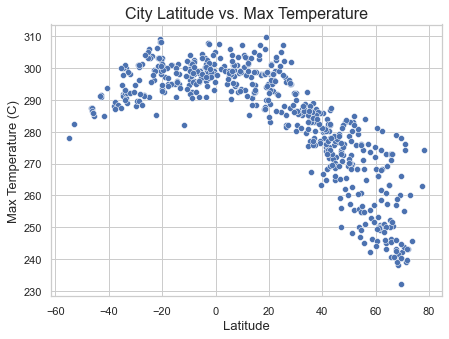

In [12]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Max Temp')

ax.set_title('City Latitude vs. Max Temperature', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Max Temperature (C)', fontsize=13)

plt.show()

## Latitutde vs. Humidity Plot

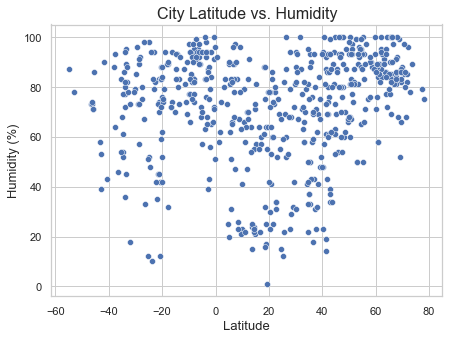

In [13]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Humidity')

ax.set_title('City Latitude vs. Humidity', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Humidity (%)', fontsize=13)

plt.show()

## Latitude vs. Cloudiness Plot

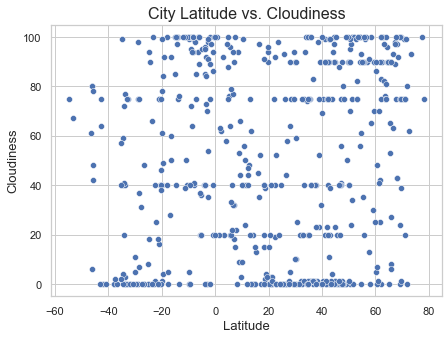

In [14]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Cloudiness')

ax.set_title('City Latitude vs. Cloudiness', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Cloudiness', fontsize=13)

plt.show()

## Latitude vs. Wind Speed Plot

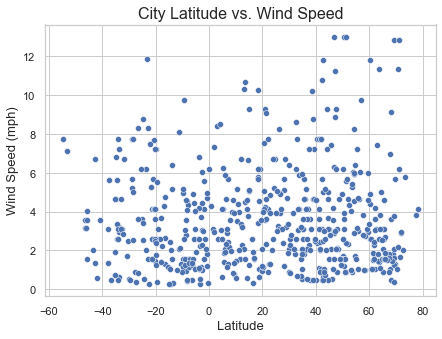

In [15]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Wind Speed')

ax.set_title('City Latitude vs. Wind Speed', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Wind Speed (mph)', fontsize=13)

plt.show()

## Linear Regression

In [16]:
# Split the dataset into Northern Hemisphere and Southern Hemisphere
northern_hemisphere = cities[cities['Latitude'] >= 0]
southern_hemisphere = cities[cities['Latitude'] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
# Perform a linear regression
x_vals = northern_hemisphere['Latitude']
y_vals = northern_hemisphere['Max Temp']
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = linregress(x_vals, y_vals)

# Create equation of line to calculate predicted value
nh_fit = nh_slope * x_vals + nh_intercept
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept, 2))
print(line_eq)

y =-0.78x + 308.78


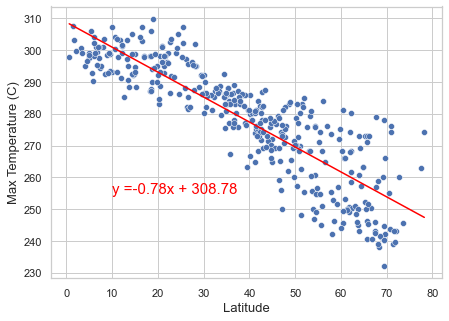

The r-value is: -0.87


In [28]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=northern_hemisphere, x='Latitude', y='Max Temp')
sns.lineplot(data= northern_hemisphere, x= x_vals, y= nh_fit, color='red')
plt.annotate(line_eq, (10,255), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Max Temperature (C)', fontsize=13)

plt.show()
print(f"The r-value is: {round(nh_rvalue,2)}")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
x_vals = southern_hemisphere['Latitude']
y_vals = southern_hemisphere['Max Temp']

# Perform a linear regression
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = linregress(x_vals, y_vals)

# Create equation of line to calculate predicted value
sh_fit = sh_slope * x_vals + sh_intercept

line_eq_sh = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))
print(line_eq)

y =-0.78x + 308.78


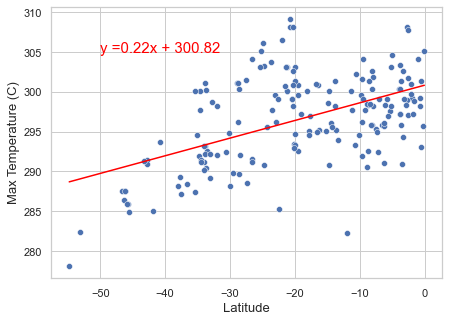

The r-value is 0.52


In [25]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=southern_hemisphere, x=x_vals, y=y_vals)
sns.lineplot(data=southern_hemisphere,x= x_vals, y=sh_fit, color='red')
plt.annotate(line_eq_sh, (-50,305), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Max Temperature (C)', fontsize=13)

plt.show()
print(f'The r-value is {round(sh_rvalue,2)}')